In [1]:
# Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading file(Rossmann Stores Data.csv)
# path = '/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Capstone Project/Regression/'
path = 'E:/Data Science/amlabetter/Capstone Projects/REGRESSION/'

f_names = ['Rossmann Stores Data.csv','store.csv']

In [3]:
# function to calculate the percentage of null values
def null_calculator(df):
  result = {}
  for col in df.columns:
    result[col] = round(len(df[df[col].isna() == True])/len(df),4)*100
  return result

# EDA

## First dataset rossmann_df

In [4]:
# Loading and reading data
# rossmann_original_df = pd.read_csv(path+f_names[0])
# rossmann_df = rossmann_original_df.copy()
rossmann_df = pd.read_csv(path+f_names[0])
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
# Take a look on data type and null values
rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [6]:
# Data Summary
rossmann_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
# approximately 17% observations are zero
print(f"Percentage of data when shops were closed : {round(len(rossmann_df[rossmann_df['Open'] == 0])/len(rossmann_df),4)*100}.")

# Dropping the data when shops were closed and also dropping the colum 'Open'.
rossmann_df = rossmann_df[rossmann_df['Open'] == 1]
rossmann_df.drop( columns=['Open'], inplace = True)

Percentage of data when shops were closed : 16.99.


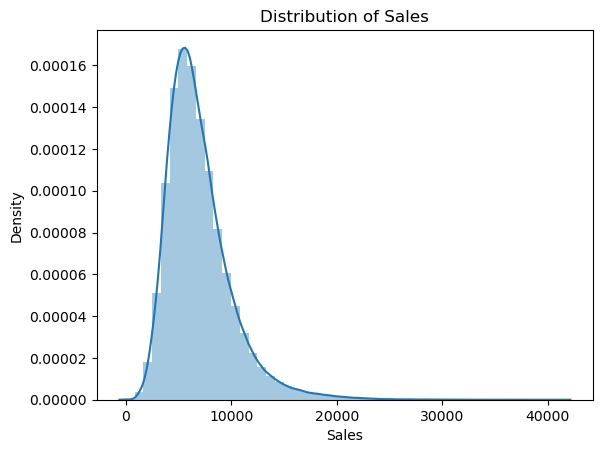

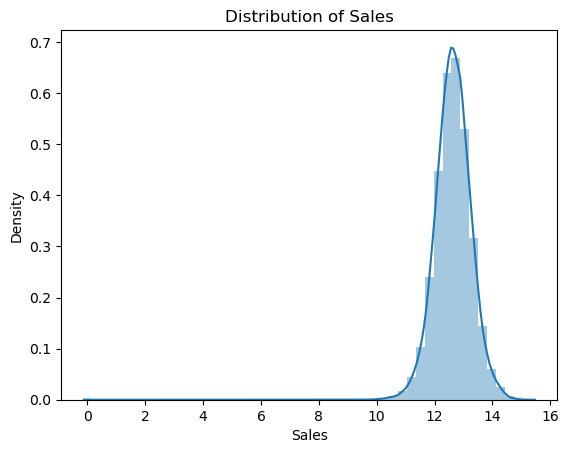

In [8]:
# Distribution of 'Sales'

# Before log transformation
sns.distplot(rossmann_df['Sales'])
plt.title('Distribution of Sales')
plt.show()
# After log transformation
sns.distplot(np.log2(rossmann_df['Sales']+1))
plt.title('Distribution of Sales')
plt.show()

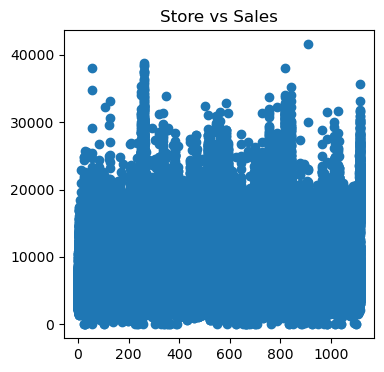

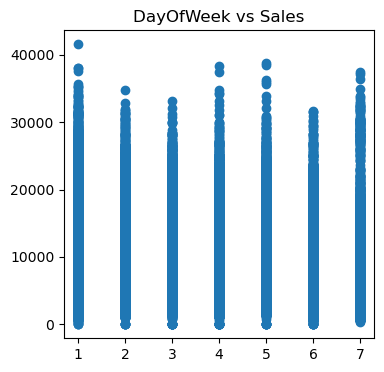

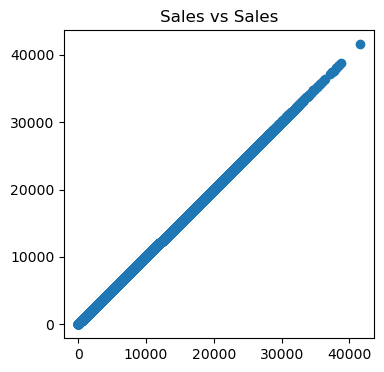

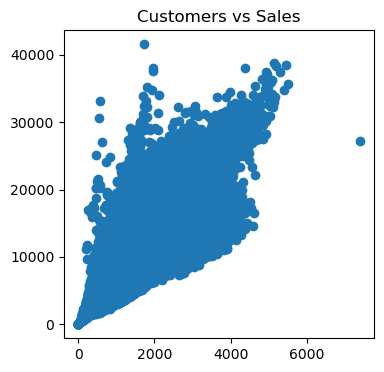

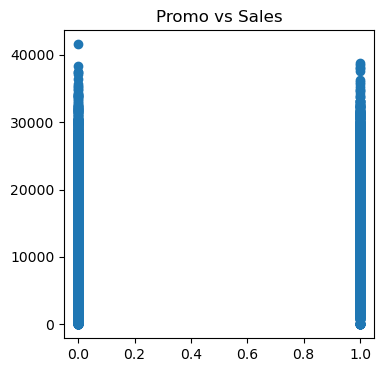

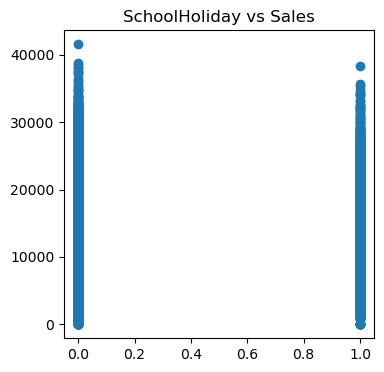

In [9]:
# Scatter plots Sales vs All Numerical columns
plt.rcParams['figure.figsize'] = (4,4)
for col in rossmann_df.describe().columns:
    
    plt.scatter(rossmann_df[col],rossmann_df['Sales'])
    plt.title(col+' vs Sales')
    plt.show()

<AxesSubplot:xlabel='DayOfWeek'>

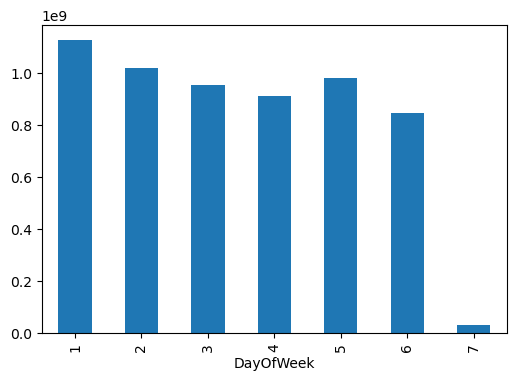

In [10]:
# Sales in different Days
plt.rcParams['figure.figsize'] = (6,4)
rossmann_df.groupby(['DayOfWeek'])['Sales'].sum().plot.bar()

Text(0, 0.5, 'Sales')

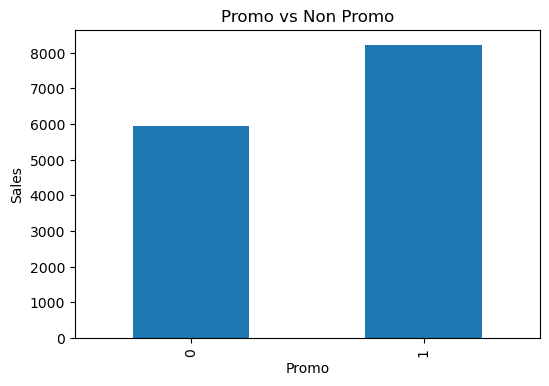

In [11]:
# Sales comparison for promotional and non promotional
rossmann_df.groupby(['Promo'])['Sales'].mean().plot.bar()
plt.title('Promo vs Non Promo')
plt.xlabel('Promo')
plt.ylabel('Sales')

In [12]:
# Econding StateHoliday
# '0'>0>a>b>c
print(f"Different catagories for StateHoliday : {rossmann_df.groupby(['StateHoliday'])['Sales'].mean()}")

# function for encoding the column 'StateHoliday'
def State_holiday_encoder(col):
    if col == 'c':
        return 1
    elif col == 'b':
        return 2
    elif col == 'a':
        return 3
    elif col == '0':
        return 4
    elif col == 0:
        return 5
    else:
        print('invalid')
        
# applying the  above function
rossmann_df['Holiday'] = rossmann_df['StateHoliday'].apply(State_holiday_encoder)
# dropping the column 'StateHoliday'
rossmann_df.drop(columns=['StateHoliday'], inplace= True)

Different catagories for StateHoliday : StateHoliday
0    6701.492117
0    6992.158856
a    8487.471182
b    9887.889655
c    9743.746479
Name: Sales, dtype: float64


In [13]:
# from str to date time conversion
from datetime import datetime
rossmann_df['Date'] = rossmann_df['Date'].apply(lambda col: datetime.strptime(col,'%Y-%m-%d'))

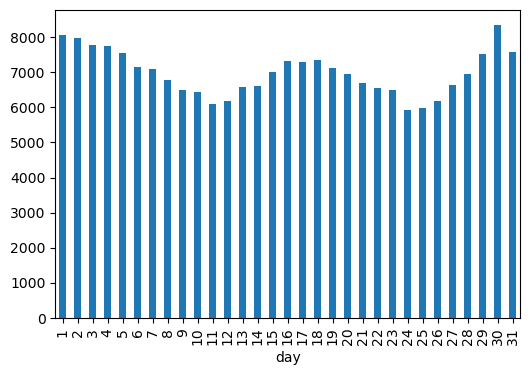

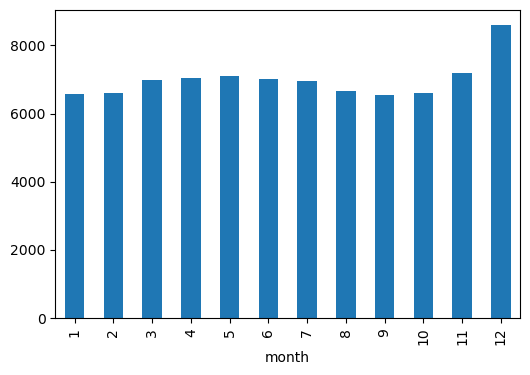

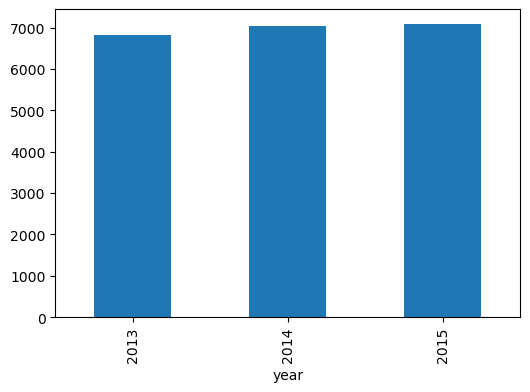

In [14]:
# creating day, month, year columns
rossmann_df['day'] = rossmann_df['Date'].apply(lambda d: d.day)
rossmann_df['month'] = rossmann_df['Date'].apply(lambda m: m.month)
rossmann_df['year'] = rossmann_df['Date'].apply(lambda y: y.year)

# looking for the patter in a specific day, month, year
rossmann_df.groupby(['day'])['Sales'].mean().plot.bar()
plt.show()
rossmann_df.groupby(['month'])['Sales'].mean().plot.bar()
plt.show()
rossmann_df.groupby(['year'])['Sales'].mean().plot.bar()
plt.show()

In [15]:
# there is not a specific spattern in day, months, year therefore dropping the newly created columns
rossmann_df.drop(columns=['day','month','year'], inplace= True)
# I think there is no use for date column therefore dropping it
# rossmann_df.drop(columns=['Date'], inplace= True)

## Second dateset 'store_df'

In [16]:
# loading store.csv dateset
# store_original_df = pd.read_csv(path+f_names[1])
# store_df = store_original_df.copy()
store_df = pd.read_csv(path+f_names[1])
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [17]:
# data info
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [18]:
# There are 5 such columns where more than 30% null values in the dataset therefore dropping such columns would be good dicision
# because we lost 31% of informations
null_calculator(store_df)

{'Store': 0.0,
 'StoreType': 0.0,
 'Assortment': 0.0,
 'CompetitionDistance': 0.27,
 'CompetitionOpenSinceMonth': 31.75,
 'CompetitionOpenSinceYear': 31.75,
 'Promo2': 0.0,
 'Promo2SinceWeek': 48.79,
 'Promo2SinceYear': 48.79,
 'PromoInterval': 48.79}

In [19]:
# dropping the columns having more than 30% null values
col_tobe_dropped = ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 
                    'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']
store_df.drop( columns=col_tobe_dropped, inplace=True)
# dropping null values less than 1%
store_df.dropna( subset=['CompetitionDistance'], inplace= True)

## Third dataset after merging store_df and rossmann_df

In [20]:
# Merging rossmann_df and store_df on the column 'Store'
final_df = rossmann_df.merge(store_df,how='left', on='Store').dropna()
final_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,SchoolHoliday,Holiday,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,4,c,a,1270.0,0.0
1,2,5,2015-07-31,6064,625,1,1,4,a,a,570.0,1.0
2,3,5,2015-07-31,8314,821,1,1,4,a,a,14130.0,1.0
3,4,5,2015-07-31,13995,1498,1,1,4,c,c,620.0,0.0
4,5,5,2015-07-31,4822,559,1,1,4,a,a,29910.0,0.0


In [21]:
# info
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842206 entries, 0 to 844391
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Store                842206 non-null  int64         
 1   DayOfWeek            842206 non-null  int64         
 2   Date                 842206 non-null  datetime64[ns]
 3   Sales                842206 non-null  int64         
 4   Customers            842206 non-null  int64         
 5   Promo                842206 non-null  int64         
 6   SchoolHoliday        842206 non-null  int64         
 7   Holiday              842206 non-null  int64         
 8   StoreType            842206 non-null  object        
 9   Assortment           842206 non-null  object        
 10  CompetitionDistance  842206 non-null  float64       
 11  Promo2               842206 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(7), object(2)
memory usage: 83.5

<AxesSubplot:xlabel='Store,StoreType'>

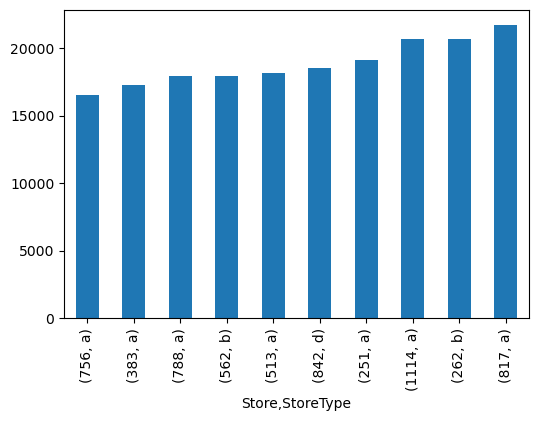

In [22]:
# top 10 stores for which there are highest sales
final_df.groupby(['Store','StoreType'])['Sales'].mean().sort_values()[-10:].plot.bar()

In [23]:
final_df.groupby(['StoreType'])['Sales'].sum()

StoreType
a    3161949577
b     159231395
c     783221426
d    1756794396
Name: Sales, dtype: int64

In [24]:
# Assortment and StoreType columns one hot encoding
final_df['AssortmentA'] = final_df['Assortment'].apply(lambda data: 1 if data == 'a' else 0)
final_df['AssortmentB'] = final_df['Assortment'].apply(lambda data: 1 if data == 'b' else 0)
final_df['AssortmentC'] = final_df['Assortment'].apply(lambda data: 1 if data == 'c' else 0)

final_df['StoreTypeA'] = final_df['StoreType'].apply(lambda data: 1 if data == 'a' else 0)
final_df['StoreTypeB'] = final_df['StoreType'].apply(lambda data: 1 if data == 'b' else 0)
final_df['StoreTypeC'] = final_df['StoreType'].apply(lambda data: 1 if data == 'c' else 0)
final_df['StoreTypeD'] = final_df['StoreType'].apply(lambda data: 1 if data == 'd' else 0)

final_df.drop(columns =['Assortment', 'StoreType'], inplace= True)

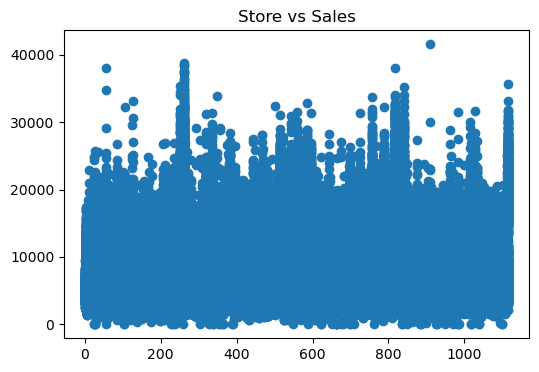

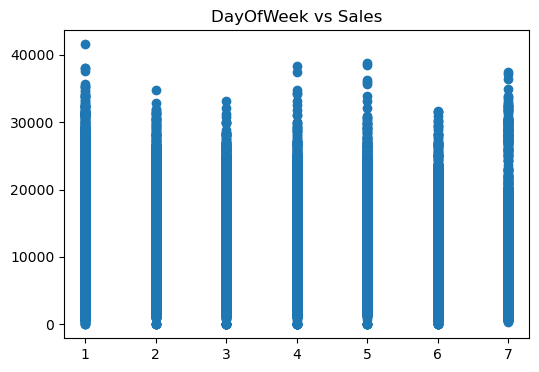

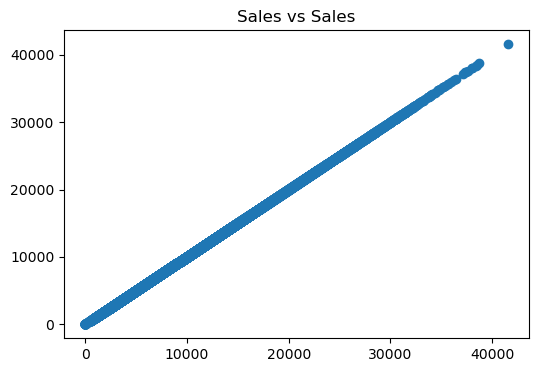

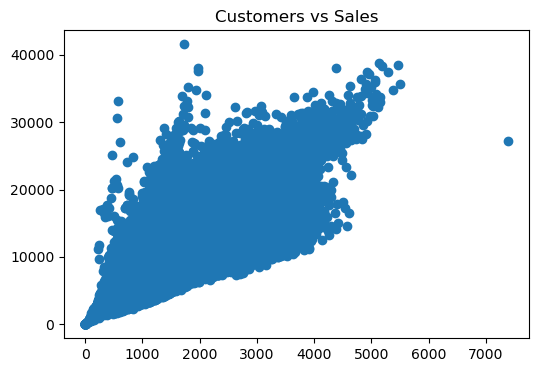

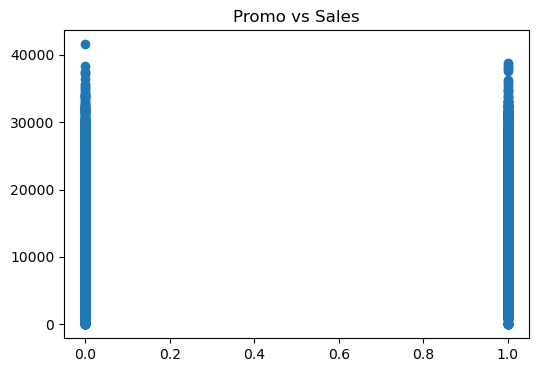

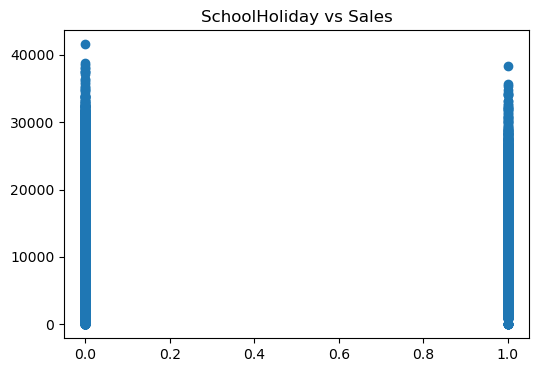

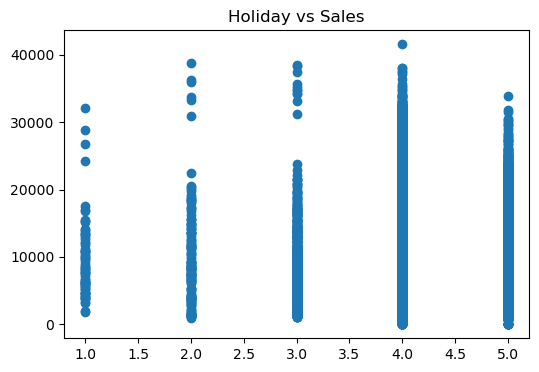

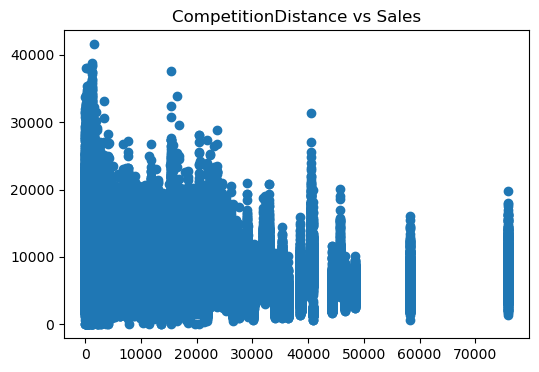

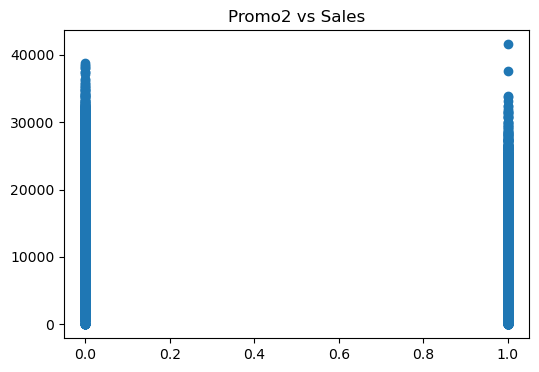

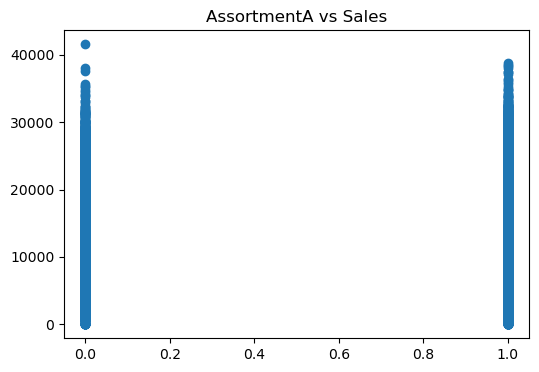

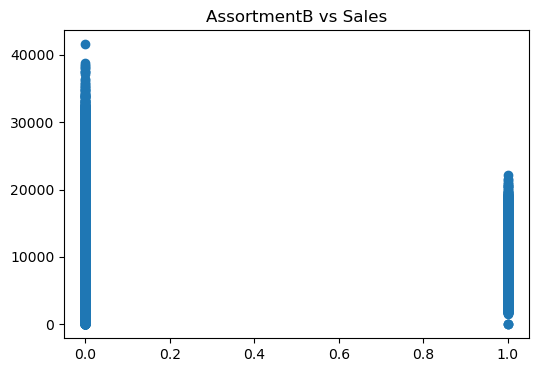

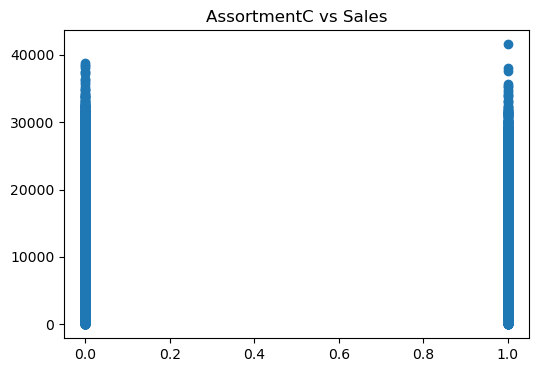

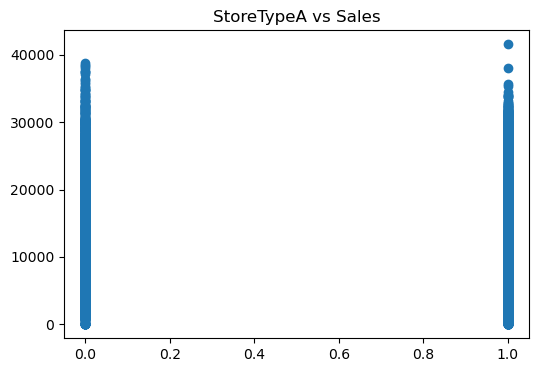

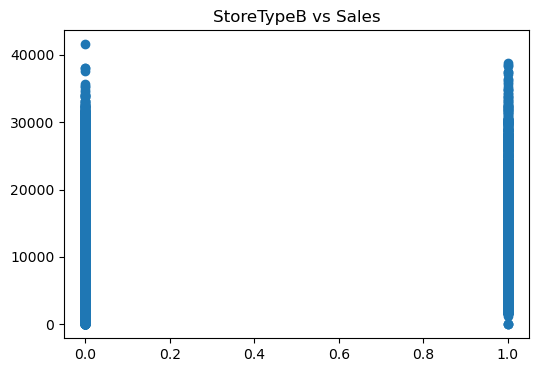

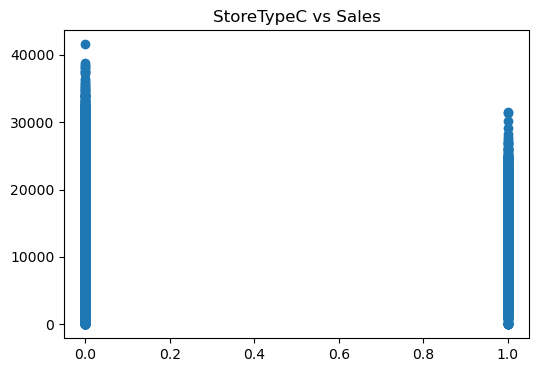

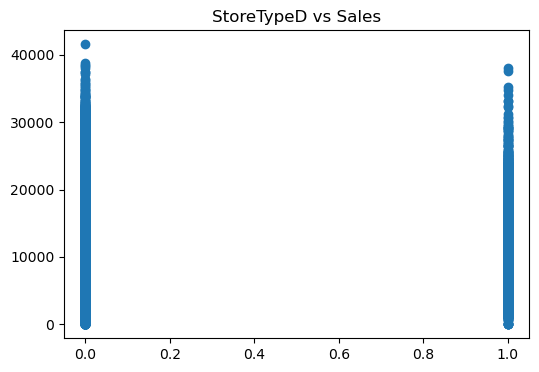

In [25]:
# Scatter plots Sales vs All Numerical columns
for col in final_df.describe().columns:
    
    plt.scatter(final_df[col],final_df['Sales'])
    plt.title(col+' vs Sales')
    plt.show()

<AxesSubplot:>

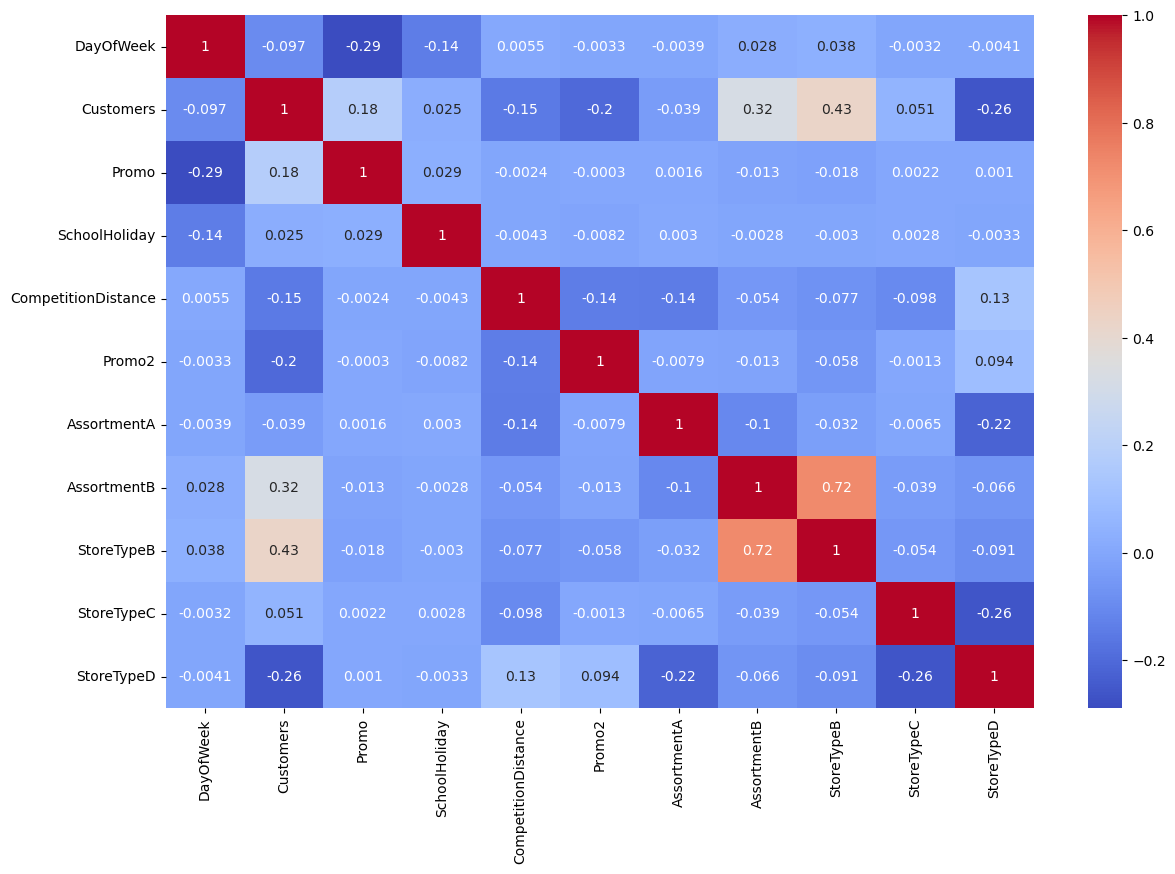

In [26]:
# correlation visualization
plt.rcParams['figure.figsize'] = (14,9)
drop_cols = ['Store','StoreTypeA','AssortmentC','Holiday','Sales']
corr = final_df.drop( columns= drop_cols).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [27]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [28]:
# Multicolinearitiy check
calc_vif(final_df[[i for i in final_df.describe().columns if i not in ['Sales','Store','StoreTypeA','AssortmentC','Holiday'] ]])

,variables,VIF
0,DayOfWeek,3.763115
1,Customers,4.177985
2,Promo,1.952497
3,SchoolHoliday,1.227895
4,CompetitionDistance,1.473533
5,Promo2,1.887787
6,AssortmentA,2.010776
7,AssortmentB,2.153077
8,StoreTypeB,2.336594
9,StoreTypeC,1.228927


In [29]:
# These are the columns to be dropped before applying machine learning algorithm
cols_not_required = ['StoreTypeA','AssortmentC','Holiday','Store','Date']
print(f" columns to be dropped : {cols_not_required}")
final_df.drop( columns= cols_not_required, inplace= True)
final_df.head()

 columns to be dropped : ['StoreTypeA', 'AssortmentC', 'Holiday', 'Store', 'Date']


,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,Promo2,AssortmentA,AssortmentB,StoreTypeB,StoreTypeC,StoreTypeD
0,5,5263,555,1,1,1270.0,0.0,1,0,0,1,0
1,5,6064,625,1,1,570.0,1.0,1,0,0,0,0
2,5,8314,821,1,1,14130.0,1.0,1,0,0,0,0
3,5,13995,1498,1,1,620.0,0.0,0,0,0,1,0
4,5,4822,559,1,1,29910.0,0.0,1,0,0,0,0


# Preprocessing after EDA

In [30]:
# Importing modules for preprocessing
from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(final_df.drop(columns=['Sales']).values)
Y = final_df['Sales'].values

In [31]:
# train test split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain,ytest = train_test_split(X,Y,random_state=0)

# Fittting ML algorithms

## Linear Regression

In [32]:
# importing ML modules
from numpy import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# fitting linear model
linear_simple_model = LinearRegression()
linear_simple_model.fit(xtrain,ytrain)

LinearRegression()

In [33]:
# Coefficients for the model
linear_simple_model.coef_

array([ -245.20495611, 54537.34117616,  1143.29436275,    54.9572276 ,
        1940.10538941,   300.90347644,  -308.20264018, -4440.38299989,
       -3214.52641216,  -141.43437637,  1137.50230208])

In [34]:
# Predicting for test and train
pred_train = linear_simple_model.predict(xtrain)
pred_test = linear_simple_model.predict(xtest)

In [35]:
# R2 score for train and test
print(f"R2_score train : {r2_score(ytrain,pred_train)}")
print(f"R2_score test : {r2_score(ytest,pred_test)}")

R2_score train : 0.8225822397200768
R2_score test : 0.8221694098800242


In [36]:
# mean squared for train and test
print(f"Root mean squared error train : {np.math.sqrt(mean_squared_error(ytrain,pred_train))}")
print(f"Root mean squared error test : {np.math.sqrt(mean_squared_error(ytest,pred_test))}")

Root mean squared error train : 1307.4988136940844
Root mean squared error test : 1309.539050024409


Test accuracy and Train accuracy are almost equal therefore we can say that the model is not overfitted or underfitted

## Decision Tree

In [37]:
# Fitting decission tree regressor
from sklearn.tree import DecisionTreeRegressor
dtr_model = DecisionTreeRegressor(max_depth=11)
dtr_model.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=11)

In [38]:
# Predicting for test and train
pred_train = dtr_model.predict(xtrain)
pred_test = dtr_model.predict(xtest)

In [39]:
# R2 score for train and test
print(f"R2_score train : {r2_score(ytrain,pred_train)}")
print(f"R2_score test : {r2_score(ytest,pred_test)}")

R2_score train : 0.8948264515475519
R2_score test : 0.8901090580486656


In [40]:
# mean squared for train and test
print(f"Root mean squared error train : {np.math.sqrt(mean_squared_error(ytrain,pred_train))}")
print(f"Root mean squared error test : {np.math.sqrt(mean_squared_error(ytest,pred_test))}")

Root mean squared error train : 1006.690616959808
Root mean squared error test : 1029.4284502700734


Initially the model was overfitted but after limitting max_depth = 11 now it seems that the model is giving good result

## Evaluating Decission tree using GridSearchCV

In [41]:
# cross validation
from sklearn.model_selection import GridSearchCV
dtr_model = DecisionTreeRegressor()
grid_params = {'max_depth' : [5,13,14]}
grid_model = GridSearchCV(estimator=dtr_model,cv= 3, param_grid=grid_params, verbose=2)
grid_model.fit(xtrain,ytrain)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END ........................................max_depth=5; total time=   0.8s
[CV] END ........................................max_depth=5; total time=   0.8s
[CV] END ........................................max_depth=5; total time=   0.8s
[CV] END .......................................max_depth=13; total time=   1.7s
[CV] END .......................................max_depth=13; total time=   1.7s
[CV] END .......................................max_depth=13; total time=   1.7s
[CV] END .......................................max_depth=14; total time=   2.0s
[CV] END .......................................max_depth=14; total time=   1.8s
[CV] END .......................................max_depth=14; total time=   1.8s


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 13, 14]}, verbose=2)

In [42]:
# best parameters
grid_model.best_params_

{'max_depth': 14}

In [43]:
# best model
best_model = grid_model.best_estimator_

In [44]:
# Predicting for test and train
pred_train = best_model.predict(xtrain)
pred_test = best_model.predict(xtest)

In [45]:
# R2 score for train and test
print(f"R2_score train : {r2_score(ytrain,pred_train)}")
print(f"R2_score test : {r2_score(ytest,pred_test)}")

R2_score train : 0.9299038353080229
R2_score test : 0.9195310092507557


In [46]:
# mean squared for train and test
print(f"Root mean squared error train : {np.math.sqrt(mean_squared_error(ytrain,pred_train))}")
print(f"Root mean squared error test : {np.math.sqrt(mean_squared_error(ytest,pred_test))}")

Root mean squared error train : 821.8449396231358
Root mean squared error test : 880.9058535229658
